# fasterrcnn_resnet50_fpn

Compared with R-CNN, Faster RCNN has already implemented feature extraction, proposal extraction, bounding box regression(rect refine), classification is integrated in a network, so that the  performance has been greatly improved, especially in the detection speed.

The model is obtained by training the COCO dataset.  
FPN, also known as Feature Pyramid Networks, is a multi-scale object detection algorithm  
ResNet(residual networks) in order to deal with the degradation of deep neural networks  

In [1]:
#Python Image Library
from PIL import Image
import matplotlib.pyplot as plt
# pip install -U matplotlib
import torch
# pip install pytorch
import torchvision.transforms as T
import torchvision
# pip install torchvision
import numpy as np
import cv2

import os

In [2]:
#Solve kernel failure problems in Jupyter Notebook
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

# Download model 
Download model through the fasterrcnn_resnet50_fpn function
The model is stored in https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth

In [3]:
#pretrained=True will get the pretrained weights for the model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
#model.eval() to use the model for inference
model.eval()

c:\users\win\appdata\local\programs\python\python38\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
c:\users\win\appdata\local\programs\python\python38\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

# COCO
Microsoft Common Objects in Context(MS COCO)
COCO is a large-scale object detection, segmentation, and captioning dataset. COCO has several features

In [4]:
COCO_INSTANCE_CATEGORY_NAMES = ["unlabeled", "person", "bicycle", "car", "motorcycle", "airplane", "bus", "train", "truck", "boat",
    "traffic light", "fire hydrant", "street sign", "stop sign", "parking meter", "bench", "bird", "cat", "dog", "horse",
    "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "hat", "backpack", "umbrella", "shoe",
    "eye glasses", "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", "sports_ball", "kite", "baseball bat",
    "baseball glove", "skateboard", "surfboard", "tennis racket", "bottle", "plate", "wine glass", "cup", "fork", "knife",
    "spoon", "bowl", "banana", "apple", "sandwich", "orange", "broccoli", "carrot", "hot_dog", "pizza",
    "donut", "cake", "chair", "couch", "potted plant", "bed", "mirror", "dining table", "window", "desk",
    "toilet", "door", "tv", "laptop", "mouse", "remote", "keyboard", "cell phone", "microwave", "oven",
    "toaster", "sink", "refrigerator", "blender", "book", "clock", "vase", "scissors", "teddy bear", "hair drier",
    "toothbrush", "hair brush"]

In [32]:
def get_prediction(img_path, threshold):
    img = Image.open(img_path)
    # Transform a PIL library image or numpy array to tensor type; Conversion from[0,255]->[0,1]
    transform = T.Compose([T.ToTensor()])
    img = transform(img)

    pred = model([img])
    #print("pred:",pred)
    #print("",pred[0]['labels'].numpy())
    # Category extract
    print(list(pred[0]['labels'].numpy()))
    pred_class = [COCO_INSTANCE_CATEGORY_NAMES[i] for i in list(pred[0]['labels'].numpy())]
    # coordinates Bounding boxes
    pred_boxes = [[(i[0], i[1]), (i[2], i[3])] for i in list(pred[0]['boxes'].detach().numpy())]

    # Find the ones that meet the similarity requirement
    pred_score = list(pred[0]['scores'].detach().numpy())
    ##Get list of index with score greater than threshold
    pred_t = [pred_score.index(x) for x in pred_score if x > threshold][-1]
    print(" pred_t:", pred_t)
    pred_boxes = pred_boxes[:pred_t + 1]
    pred_class = pred_class[:pred_t + 1]
    #print("pred_t:",pred_t)
    #print("pred_score:",pred_score)
    print("pred_class:", pred_class)
    print("pred_boxes:", pred_boxes)
    return pred_boxes, pred_class

In [33]:
from matplotlib.pyplot import figure
def object_detection_api(img_path, threshold=0.8, rect_th=3, text_size=1, text_th=2):
    boxes, pred_cls = get_prediction(img_path, threshold)
    img = cv2.imread(img_path)
    # Convert to RGB image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    for i in range(len(boxes)):

        # Frame the target according to the coordinates
        #cv2.rectangle(img, pt1, pt2, color, thickness, lineType, shift )
        #(Picture, coordinates in the upper left corner of rectangle box, coordinates in the lower right corner of rectangle box, font color, font thickness)
        cv2.rectangle(img, (int(boxes[i][0][0]), int(boxes[i][0][1])), (int(boxes[i][1][0]), int(boxes[i][1][1])),
                      color=(0, 255, 0),
                      thickness=rect_th)
        # category
        #cv2.putText 
        #The parameters are: image, added text, upper left coordinate, font, font size, color, font size
        cv2.putText(img, pred_cls[i], (int(boxes[i][0][0]), int(boxes[i][0][1])), cv2.FONT_HERSHEY_SIMPLEX, text_size,
                    (0, 255, 0), thickness=text_th)
    #figure(figsize=(10,10)，dpi=70)
    figure(figsize=(12,12), dpi=70)
    plt.imshow(img)
    plt.show()

[1, 32, 64, 64, 3, 64, 64, 64, 64]
 pred_t 1
pred_class: ['person', 'tie']
pred_boxes: [[(554.754, 145.96996), (806.10547, 730.5081)], [(648.80347, 301.6787), (679.9308, 431.65488)]]


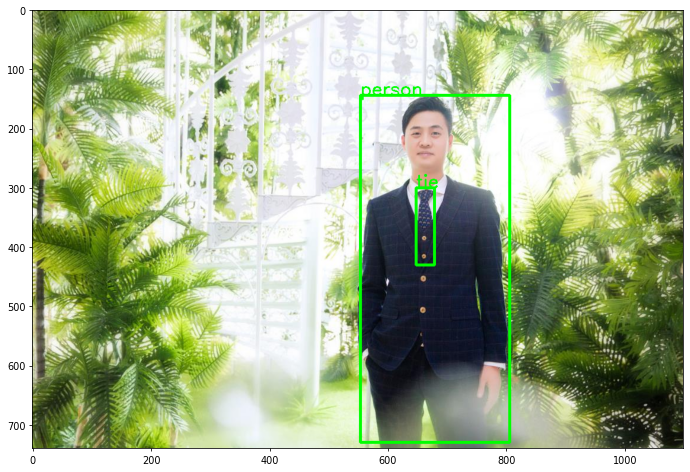

In [34]:
object_detection_api(img_path=r"D:\MyJupyternote\fasterrcnn_resnet50_fpn\image\tx.jpg")

In [ ]:
object_detection_api(img_path=r"D:\MyJupyternote\fasterrcnn_resnet50_fpn\image\1.jpg")

In [ ]:
object_detection_api(img_path=r"D:\MyJupyternote\fasterrcnn_resnet50_fpn\image\2.jpg")

In [ ]:
object_detection_api(img_path=r"D:\MyJupyternote\fasterrcnn_resnet50_fpn\image\3.jpg")